# Считывание текстового файла для определения персентиля

In [1]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
from os import path

## input data

In [2]:
# change these fields
current_date = '08.08.2022'
satellite_label = 'S3A'

BASE_DIR = '/media/data1/laboratory/results/aerosol-2022/'

In [3]:
# static input fields
wdir = 'l2gen/results/AOT_percentiles'
aot_dir = 'AOT'
f_aot_measured = 'AOT_measured_interpolated.csv'

In [4]:
#calculated fields
day, month, year = current_date.split('.')
wdir = path.join(BASE_DIR, wdir)
aot_dir = path.join(BASE_DIR, aot_dir)
f_mask = f'l2gen_{satellite_label}_{year}-{month}-{day}_ac-2_Mask.txt'

masked = path.join(wdir, f_mask)
f_aot_measured = path.join(aot_dir, f_aot_measured)

##### calculate percentile through text file masked datellite data l2_flags.COASTZ and (not l2_flags.CLDICE)

#### read expedition data

In [6]:
expedition_dates = ['31.05.2022', '24.06.2022', '27.07.2022', '01.08.2022', '02.08.2022', '08.08.2022']

In [7]:
aot_measured_table = pd.read_csv(f_aot_measured, header=0, delimiter='\t', index_col=0, 
                                 names=expedition_dates)

In [8]:
aot_measured_table

,31.05.2022,24.06.2022,27.07.2022,01.08.2022,02.08.2022,08.08.2022
400.00,0.076960,0.054449,0.398926,0.066378,0.091255,0.380754
412.50,0.073947,0.052017,0.380155,0.063834,0.088336,0.362828
442.50,0.067508,0.046866,0.340571,0.058390,0.082021,0.325025
490.00,0.059140,0.040281,0.290302,0.051299,0.073645,0.277024
510.00,0.056148,0.037957,0.272670,0.048758,0.070598,0.260188
560.00,0.049731,0.033035,0.235516,0.043299,0.063956,0.224715
620.00,0.043577,0.028400,0.200811,0.038049,0.057436,0.191582
665.00,0.039790,0.025594,0.179940,0.034810,0.053338,0.171658
673.75,0.039120,0.025102,0.176293,0.034237,0.052606,0.168177
681.25,0.038562,0.024692,0.173263,0.033759,0.051994,0.165285


#### read satellite data

In [11]:
# satellite bands
bands = [400, 412, 443, 490, 510, 560, 620, 665, 674, 682, 709, 754, 762, 765, 768, 
         779, 866, 884, 899, 939, 1013, 'angstrom']

In [12]:
# use columns for aot and angstrom
usecolumns = range(16,38)

In [13]:
water_table = pd.read_csv(masked, header=0, delimiter='\t', usecols=usecolumns, names=bands)

In [14]:
water_table.head()

,400,412,443,490,510,560,620,665,674,682,...,762,765,768,779,866,884,899,939,1013,angstrom
0,0.6631,0.6451,0.6007,0.5406,0.5181,0.4686,0.4207,0.3916,0.3865,0.3822,...,0.3427,0.3414,0.3402,0.3356,0.3074,0.3028,0.2993,0.2910,0.2789,0.9994
1,0.6564,0.6367,0.5883,0.5226,0.4980,0.4438,0.3912,0.3590,0.3533,0.3487,...,0.3047,0.3033,0.3019,0.2968,0.2651,0.2598,0.2558,0.2463,0.2322,1.1893
2,0.6760,0.6552,0.6041,0.5348,0.5088,0.4515,0.3959,0.3619,0.3559,0.3509,...,0.3044,0.3028,0.3013,0.2959,0.2622,0.2566,0.2524,0.2422,0.2271,1.2450
3,0.6377,0.6187,0.5718,0.5083,0.4844,0.4320,0.3811,0.3500,0.3445,0.3400,...,0.2975,0.2961,0.2947,0.2898,0.2592,0.2540,0.2502,0.2411,0.2274,1.1806
4,0.6682,0.6491,0.6022,0.5385,0.5146,0.4622,0.4113,0.3803,0.3748,0.3703,...,0.3281,0.3267,0.3253,0.3205,0.2902,0.2851,0.2813,0.2724,0.2591,1.0892


#### calculate quantiles

In [ ]:
# quantile calculated
quantiles = np.linspace(0.01, 0.1, 10)

In [15]:
quantiles_table = water_table.quantile(q=quantiles, axis=0, 
                                       numeric_only=True, interpolation='linear').T[:-1]

In [16]:
quantiles_table.loc[510:560]

,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10
510,0.268317,0.2768,0.280851,0.2849,0.287985,0.2903,0.292219,0.293736,0.2953,0.2962
560,0.232400,0.2411,0.246051,0.2482,0.250600,0.2527,0.254200,0.255700,0.2572,0.2584


In [17]:
col_plots = range(1, 10, 2)

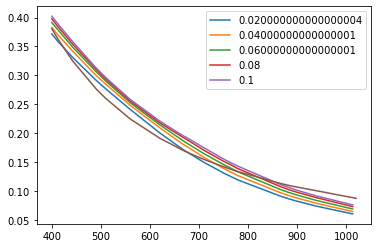

In [18]:
quantiles_table.plot(y=col_plots)
aot_measured_table[current_date].plot();

#### calculate quantiles after filtering zero and nan aot

In [23]:
filtered_aot = water_table.loc[water_table.ne(0).all(axis=1)]
non_zero = len(filtered_aot)
print(f'Отфильтровано нулевых значений: {len(water_table) - non_zero}')

Отфильтровано нулевых значений: 0


In [24]:
filtered_aot = filtered_aot.dropna(how='all')
print(f'Отфильтровано NaN значений: {non_zero - len(filtered_aot)}')

Отфильтровано NaN значений: 5


In [25]:
quantiles_filtered = filtered_aot.quantile(q=quantiles, axis=0, numeric_only=True, 
                                           interpolation='linear').T[:-1]

In [26]:
quantiles_filtered.loc[510:560]

,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10
510,0.268317,0.2768,0.280851,0.2849,0.287985,0.2903,0.292219,0.293736,0.2953,0.2962
560,0.232400,0.2411,0.246051,0.2482,0.250600,0.2527,0.254200,0.255700,0.2572,0.2584


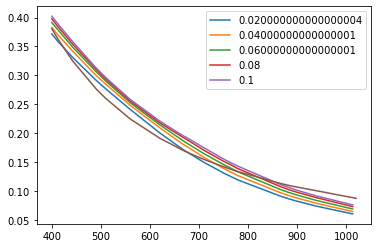

In [27]:
quantiles_filtered.plot(y=col_plots)
aot_measured_table[current_date].plot();

#### for test: median, 75th, 80th percentiles

In [28]:
water_table.quantile(q=[0.5, 0.75, 0.8], axis=0, numeric_only=True, interpolation='linear')

,400,412,443,490,510,560,620,665,674,682,...,762,765,768,779,866,884,899,939,1013,angstrom
0.50,0.522250,0.505250,0.4605,0.396000,0.371950,0.31720,0.26495,0.2342,0.228900,0.2245,...,0.18410,0.182700,0.18135,0.17650,0.14585,0.14080,0.13675,0.1264,0.109300,1.80465
0.75,0.639975,0.617275,0.5615,0.488675,0.460875,0.39820,0.33295,0.2913,0.283675,0.2771,...,0.21790,0.215875,0.21395,0.20685,0.16740,0.16210,0.15800,0.1487,0.135375,2.06650
0.80,0.671120,0.647060,0.5867,0.508180,0.480600,0.41926,0.35172,0.3083,0.300500,0.2939,...,0.23066,0.228600,0.22660,0.21940,0.17620,0.16996,0.16590,0.1558,0.141760,2.06710


#### select area within 56.65 S and 56.75 N, filter aot, calculate and plot quantiles

In [35]:
# use columns for aot and angstrom, lon, lat
usecolumns = list(range(16,38))
usecolumns += [39, 40]
newnames = bands + ['lon', 'lat']

In [36]:
water_table = pd.read_csv(masked, header=0, delimiter='\t', usecols=usecolumns, names=newnames)

In [37]:
water_table.head()

,400,412,443,490,510,560,620,665,674,682,...,768,779,866,884,899,939,1013,angstrom,lon,lat
0,0.6631,0.6451,0.6007,0.5406,0.5181,0.4686,0.4207,0.3916,0.3865,0.3822,...,0.3402,0.3356,0.3074,0.3028,0.2993,0.2910,0.2789,0.9994,43.285410,57.403500
1,0.6564,0.6367,0.5883,0.5226,0.4980,0.4438,0.3912,0.3590,0.3533,0.3487,...,0.3019,0.2968,0.2651,0.2598,0.2558,0.2463,0.2322,1.1893,43.289730,57.402782
2,0.6760,0.6552,0.6041,0.5348,0.5088,0.4515,0.3959,0.3619,0.3559,0.3509,...,0.3013,0.2959,0.2622,0.2566,0.2524,0.2422,0.2271,1.2450,43.294050,57.402065
3,0.6377,0.6187,0.5718,0.5083,0.4844,0.4320,0.3811,0.3500,0.3445,0.3400,...,0.2947,0.2898,0.2592,0.2540,0.2502,0.2411,0.2274,1.1806,43.298367,57.401344
4,0.6682,0.6491,0.6022,0.5385,0.5146,0.4622,0.4113,0.3803,0.3748,0.3703,...,0.3253,0.3205,0.2902,0.2851,0.2813,0.2724,0.2591,1.0892,43.302690,57.400627


In [38]:
selected_table = water_table.query('lat >= 56.65 and lat <= 56.75')

In [39]:
num_columns = range(0, len(selected_table.columns) - 2)
selected_table = selected_table.iloc[:, num_columns]

In [40]:
selected_table.head()

,400,412,443,490,510,560,620,665,674,682,...,762,765,768,779,866,884,899,939,1013,angstrom
2571,0.4311,0.4144,0.3733,0.3175,0.2965,0.2501,0.2047,0.1768,0.1718,0.1677,...,0.1290,0.1277,0.1264,0.1219,0.0932,0.0883,0.0846,0.0756,0.0620,2.0708
2572,0.3962,0.3809,0.3431,0.2918,0.2725,0.2299,0.1882,0.1625,0.1579,0.1541,...,0.1185,0.1173,0.1162,0.1120,0.0856,0.0811,0.0777,0.0695,0.0570,2.0708
2573,0.3845,0.3696,0.3330,0.2832,0.2644,0.2231,0.1826,0.1576,0.1532,0.1496,...,0.1150,0.1139,0.1128,0.1087,0.0831,0.0787,0.0754,0.0675,0.0553,2.0708
2574,0.5960,0.5756,0.5256,0.4575,0.4320,0.3756,0.3207,0.2869,0.2810,0.2760,...,0.2296,0.2280,0.2266,0.2212,0.1871,0.1813,0.1770,0.1666,0.1509,1.5408
2589,0.3822,0.3701,0.3403,0.3000,0.2848,0.2515,0.2190,0.1991,0.1956,0.1927,...,0.1654,0.1645,0.1636,0.1605,0.1407,0.1373,0.1348,0.1288,0.1199,1.3182


In [42]:
with_zero = len(selected_table)
selected_table = selected_table.loc[selected_table.ne(0).all(axis=1)]
print(f'Отфильтровано нулевых значений: {with_zero - len(selected_table)}')

Отфильтровано нулевых значений: 0


In [43]:
with_nan = len(selected_table)
selected_table = selected_table.dropna(how='all')
print(f'Отфильтровано NaN значений: {with_nan - len(selected_table)}')

Отфильтровано NaN значений: 0


In [44]:
quantiles_area = selected_table.quantile(q=quantiles, axis=0, numeric_only=True, 
                                         interpolation='linear').T[:-1]

In [45]:
quantiles_area.loc[510:560]

,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10
510,0.253896,0.264400,0.268096,0.271264,0.27406,0.276296,0.277386,0.279028,0.2804,0.28234
560,0.214230,0.225432,0.232694,0.236528,0.23966,0.242696,0.245024,0.246028,0.2469,0.24736


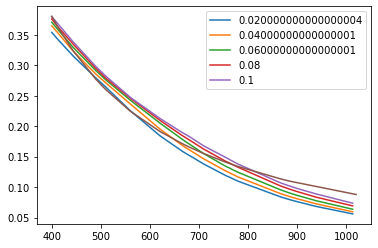

In [48]:
quantiles_area.plot(y=col_plots)
aot_measured_table[current_date].plot();

### write quantile table for area/filtered in csv-file

In [47]:
quantiles_area.T

,400,412,443,490,510,560,620,665,674,682,...,754,762,765,768,779,866,884,899,939,1013
0.01,0.349832,0.339466,0.313064,0.271896,0.253896,0.214230,0.175330,0.151364,0.147098,0.143598,...,0.113132,0.110398,0.109298,0.108232,0.104398,0.079732,0.075532,0.072366,0.064732,0.053066
0.02,0.354196,0.343024,0.315832,0.279060,0.264400,0.225432,0.184532,0.159332,0.154832,0.151132,...,0.119100,0.116232,0.115032,0.113932,0.109832,0.083932,0.079500,0.076200,0.068132,0.055900
0.03,0.358598,0.348198,0.319994,0.282094,0.268096,0.232694,0.190496,0.164494,0.159896,0.155996,...,0.122996,0.119996,0.118796,0.117598,0.113398,0.086698,0.082098,0.078698,0.070398,0.057698
0.04,0.365028,0.353656,0.323956,0.285492,0.271264,0.236528,0.195620,0.168964,0.164264,0.160300,...,0.126556,0.123492,0.122256,0.121056,0.116756,0.089192,0.084492,0.080992,0.072392,0.059428
0.05,0.368330,0.356560,0.327700,0.288940,0.274060,0.239660,0.202570,0.175090,0.170190,0.166090,...,0.130900,0.127700,0.126470,0.125170,0.120740,0.092210,0.087380,0.083680,0.074850,0.061420
0.06,0.370892,0.359280,0.329996,0.291196,0.276296,0.242696,0.205396,0.178896,0.173896,0.169700,...,0.134284,0.131272,0.129972,0.128772,0.124460,0.095452,0.090360,0.086564,0.077472,0.063592
0.07,0.373434,0.362024,0.333124,0.292910,0.277386,0.245024,0.208586,0.182724,0.178110,0.174310,...,0.138862,0.135624,0.134262,0.132962,0.128224,0.098724,0.093700,0.089800,0.080300,0.066768
0.08,0.376184,0.363700,0.335400,0.294784,0.279028,0.246028,0.209884,0.185040,0.180628,0.176528,...,0.142512,0.139540,0.138284,0.137028,0.132700,0.101828,0.096728,0.092768,0.083356,0.069052
0.09,0.377494,0.365594,0.336794,0.296494,0.280400,0.246900,0.211388,0.187188,0.182594,0.178576,...,0.144788,0.141488,0.140182,0.139064,0.134370,0.105570,0.100294,0.096288,0.086194,0.071188
0.10,0.379900,0.368800,0.339060,0.297960,0.282340,0.247360,0.213020,0.189940,0.185900,0.182080,...,0.148820,0.145320,0.143960,0.142740,0.137980,0.106860,0.101900,0.097900,0.088600,0.073500


In [406]:
ofile = f'AOT-percentile_{satellite_label}_{year}-{month}-{day}.csv'
ofile = path.join(wdir, ofile)
quantiles_area.T.to_csv(ofile, sep='\t')